# Programming Assignment 2: Linear Regression

## Instructions

- The aim of this assignment is to give you a hands-on with a real-life machine learning application.
- Use separate training, and testing data as discussed in class.
- You can only use Python programming language and Jupyter Notebooks.
- There are three parts of this assignment. In parts 1 & 2, you can only use **numpy, scipy, pandas, matplotlib and are not allowed to use NLTK, scikit-learn or any other machine learning toolkit**. However, you have to use **scikit-learn** in part 3.
- Carefully read the submission instructions, plagiarism and late days policy below.
- Deadline to submit this assignment is: **Friday, 30th October 2020**.

## Submission Instructions

Submit your code both as notebook file (.ipynb) and python script (.py) on LMS. The name of both files should be your roll number. If you don’t know how to save .ipynb as .py [see this](https://i.stack.imgur.com/L1rQH.png). **Failing to submit any one of them will result in the reduction of marks**.

## Plagiarism Policy

The code MUST be done independently. Any plagiarism or cheating of work from others or the internet will be immediately referred to the DC. If you are confused about what constitutes plagiarism, it is YOUR responsibility to consult with the instructor or the TA in a timely manner. No “after the fact” negotiations will be possible. The only way to guarantee that you do not lose marks is “DO NOT LOOK AT ANYONE ELSE'S CODE NOR DISCUSS IT WITH THEM”.

## Late Days Policy

The deadline of the assignment is final. However, in order to accommodate all the 11th hour issues there is a late submission policy i.e. you can submit your assignment within 3 days after the deadline with 25% deduction each day.


## Introduction

In this exercise, you will implement linear regression and get to see it work on data. After completing this assignment, you will know:
- How to implement linear regression from scratch.
- How to estimate linear regression parameters using gradient descent.
- How to make predictions on new data using learned parameters.

Let's start with the necessary imports.

In [259]:
import os
import numpy as np
from matplotlib import pyplot
%matplotlib inline

## 1. Linear Regression with one variable

Linear regression assumes a linear relationship between the input variables (X) and the single output variable (Y). More specifically, that output (Y) can be calculated from a linear combination of the input variables (X). When there is a single input variable, the method is referred to as a simple linear regression.

Now you will implement simple linear regression to predict profits for a food truck. Suppose you are the CEO of a restaurant franchise and are considering different cities for opening a new outlet. The chain already has trucks in various cities and you have data for profits and populations from the cities. You would like to use this data to help you select which city to expand to next.

### 1.1 Load the dataset

The file `Data/ex1data1.txt` contains the dataset for our linear regression problem. The first column is the population of a city (in 10,000s) and the second column is the profit of a food truck in that city (in $10,000s). A negative value for profit indicates a loss. 

We provide you with the code needed to load this data. The dataset is loaded from the data file into the variables `X` and `Y`.

In [260]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [261]:
%cd /content/drive/My\ Drive/Machine\ Learning/Assignment\ 2

/content/drive/My Drive/Machine Learning/Assignment 2


In [262]:
import numpy as np
import os 

data = np.loadtxt(os.path.join('Data', 'ex1data.txt'), delimiter=',')
X, Y = data[:, 0], data[:, 1]

### 1.2 Plot the dataset
Before starting on any task, it is often useful to understand the data by visualizing it. For this dataset, you can use a scatter plot to visualize the data, since it has only two properties to plot (profit and population). Execute the next cell to visualize the data.

Text(0.5, 0, 'Population of City in 10,000s')

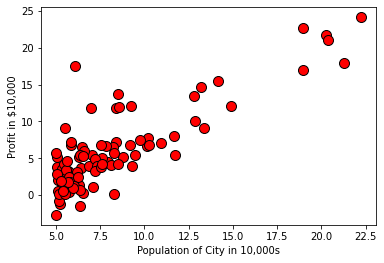

In [263]:
import matplotlib.pyplot as pyplot

pyplot.plot(X, Y, 'ro', ms=10, mec='k')
pyplot.ylabel('Profit in $10,000')
pyplot.xlabel('Population of City in 10,000s')

### 1.3 Learn the parameters
In this part, you will fit the linear regression parameters $\theta$ to the food truck dataset using gradient descent.

The objective of linear regression is to minimize the cost function

$$ J(\theta) = \frac{1}{2m} \sum_{i=1}^m \left( h_{\theta}(x^{(i)}) - y^{(i)}\right)^2 ------ (i)$$ 

where the hypothesis $h_\theta(x)$ is given by the linear model
$$ h_\theta(x) = \theta_0 + \theta_1 x ------ (ii)$$

The parameters of your model are the $\theta_j$ values. These are
the values you will adjust to minimize cost $J(\theta)$. One way to do this is to
use the batch gradient descent algorithm. In batch gradient descent, each
iteration performs the update

$$ \theta_0 = \theta_0 - \alpha \frac{1}{m} \sum_{i=1}^m \left( h_\theta(x^{(i)}) - y^{(i)}\right) ------ (iii)$$

$$ \theta_1 = \theta_1 - \alpha \frac{1}{m} \sum_{i=1}^m \left( h_\theta(x^{(i)}) - y^{(i)}\right)x^{(i)} ------ (iv)$$

With each step of gradient descent, your parameters $\theta_j$ come closer to the optimal values that will achieve the lowest cost J($\theta$).

Let's start by implementing the hypothesis $h_\theta(x)$.

In [264]:
### GRADED FUNCTION ###
def predict(x, theta0, theta1):
    h_x = 0.0
    h_x = theta0 + (theta1*x)
    return h_x

Execute the next cell to verify your implementation.

In [265]:
h_x = predict(x=2, theta0=1.0, theta1=1.0)
print('With x = 2, theta0 = 1.0, theta1 = 1.0\nPredicted Hypothesis h(x) = %.2f' % h_x)
print("Expected hypothesis h(x) = 3.00\n")

With x = 2, theta0 = 1.0, theta1 = 1.0
Predicted Hypothesis h(x) = 3.00
Expected hypothesis h(x) = 3.00



As you perform gradient descent to learn minimize the cost function  $J(\theta)$, it is helpful to monitor the convergence by computing the cost. In this section, you will implement a function to calculate  $J(\theta)$ so you can check the convergence of your gradient descent implementation.

In [266]:
### GRADED FUNCTION ###
def computeCost(X, Y, theta0, theta1):
    m = Y.size  
    J = 0
    J = (1/(2*m))*np.transpose((predict(X, theta0, theta1) - Y))@(predict(X, theta0, theta1) - Y) 
    return J

Execute the next cell to verify your implementation.

In [267]:
J = computeCost(X, Y, theta0=1.0, theta1=1.0)
print('With theta0 = 1.0, theta1 = 1.0\nPredicted cost J = %.2f' % J)
print("Expected cost J = 10.27\n")

With theta0 = 1.0, theta1 = 1.0
Predicted cost J = 10.27
Expected cost J = 10.27



Next, you will complete a function which implements gradient descent. The loop structure has been written for you, and you only need to supply the updates to parameters $\theta_j$  within each iteration (epoch). 

The starter code for the function `gradientDescent` calls `computeCost` on every iteration and saves the cost to a `python` list. Assuming you have implemented `gradientDescent` and `computeCost` correctly, your value of $J(\theta)$ should never increase, and should converge to a steady value by the end of the algorithm.

In [268]:
### GRADED FUNCTION ###
def gradientDescent(X, Y, alpha, n_epoch):
    
    m = Y.size  # number of training examples
    J = list()  # list to store cost
        
    new_X = []
    for i in range(m):
      new_X.append((1, X[i]))
    new_X = np.array(new_X)

    theta = (0.0, 0.0)
    
    for epoch in range(n_epoch):
      theta = theta - alpha*(1/m)*(np.transpose(new_X)@(predict(X, theta[0], theta[1]) - Y))     
      J.append(computeCost(X, Y, theta[0], theta[1]))
    return theta[0], theta[1], J

Execute the next cell to verify your implementation.

In [269]:
n_epoch = 1500
alpha = 0.01

theta0, theta1, J = gradientDescent(X ,Y, alpha, n_epoch)
print('Predicted theta0 = %.4f, theta1 = %.4f, cost = %.4f' % (theta0, theta1, J[-1]))
print('Expected theta0 = -3.6303, theta1 = 1.1664, cost = 4.4834')

Predicted theta0 = -3.6303, theta1 = 1.1664, cost = 4.4834
Expected theta0 = -3.6303, theta1 = 1.1664, cost = 4.4834


### 1.4 Plot the linear fit

Use your learned parameters $\theta_j$ to plot the linear fit.

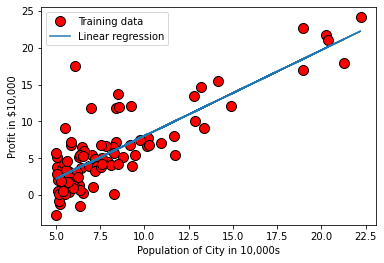

In [270]:
h_x = list()
for x in X:
    h_x.append(predict(x, theta0, theta1))
pyplot.plot(X, Y, 'ro', ms=10, mec='k')
pyplot.ylabel('Profit in $10,000')
pyplot.xlabel('Population of City in 10,000s')
pyplot.plot(X, h_x, '-')
pyplot.legend(['Training data', 'Linear regression'])

### 1.5 Make predictions

Use your learned parameters $\theta_j$ to make food truck profit predictions in areas with population of 40,000 and 65,000.

In [271]:
print('For population = 40,000, predicted profit = $%.2f' % (predict(4, theta0, theta1)*10000))
print('For population = 65,000, predicted profit = $%.2f' % (predict(6.5, theta0, theta1)*10000))

For population = 40,000, predicted profit = $10351.58
For population = 65,000, predicted profit = $39510.64


## 2. Multivariate Linear Regression

Now, you will implement multivariate linear regression (from scratch) to predict the the median price of homes in a Boston suburb during the mid-1970s. To do this, you are given with the dataset that has 404 examples in the train set and 102 examples in test set. Each example has 13 input variables (features) and one output variable (price in $10,000s). Below is the description of input variables:

- Per capita crime rate.
- The proportion of residential land zoned for lots over 25,000 square feet.
- The proportion of non-retail business acres per town.
- Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).
- Nitric oxides concentration (parts per 10 million).
- The average number of rooms per dwelling.
- The proportion of owner-occupied units built before 1940.
- Weighted distances to five Boston employment centers.
- Index of accessibility to radial highways.
- Full-value property-tax rate per $10,000.
- Pupil-teacher ratio by town.
- 1000 * (Bk - 0.63) ** 2 where Bk is the proportion of Black people by town.
- Percentage lower status of the population.

Each one of these input features is stored using a different scale. Some features are represented by a proportion between 0 and 1, other features are ranges between 1 and 12, some are ranges between 0 and 100, and so on. This is often the case with real-world data, and understanding how to explore and clean such data is an important skill to develop.

A common way to normalize features that use different scales and ranges is:

- Subtract the mean value of each feature from the dataset.
- After subtracting the mean, additionally scale (divide) the feature values by their respective standard deviations.

Note: We only use examples of the train set to estimate the mean and standard deviation.

You have to follow exactly the same steps as above i.e. implement hypothesis, cost function and gradient descent for multivariate linear regression to learn parameters $\theta$ using train set. Finally, report the cost (error) using your learned parameters $\theta$ on test set. Expected Mean Square Error on this dataset is 11.5 - 12.5 approximately. 

We provide you with the code needed to load this dataset. The dataset is loaded from the data files into the variables `train_X`, `train_Y`, `test_X` and `test_Y`.

In [272]:
train_X = np.loadtxt(os.path.join('Data', 'ex2traindata.txt'))
train_Y = np.loadtxt(os.path.join('Data', 'ex2trainlabels.txt'))
test_X = np.loadtxt(os.path.join('Data', 'ex2testdata.txt'))
test_Y = np.loadtxt(os.path.join('Data', 'ex2testlabels.txt'))

In [273]:
from statistics import mean 
from statistics import stdev

In [274]:
def normalize_1(train_data):

  train_data = (train_data - train_data.mean(axis=0)) / train_data.std(axis=0)
  return train_data
  
  # sample_max = []

  # for i in range(13):
  #   val_1 = train_data[:,i]
  #   max1 = max(val_1)
  #   sample_max.append(max1)

  # list1 = []
  # for values in train_data:
  #   list2 = []
  #   for index, item in enumerate(values):
  #     one = (item / sample_max[index])
  #     list2.append(one)
  #   list1.append(list2)

  # return list1

In [275]:
train_X = normalize_1(train_X)

In [276]:
new_X = []
for value in train_X:
  new_X.append([1, value[0],value[1],value[2],value[3],value[4],value[5],value[6],value[7],value[8],value[9],value[10],value[11],value[12]])
train_X = np.array(new_X)

In [277]:
def hyp_multi(X, theta):
  return X@theta

In [278]:
def computeCost_multi(X, Y, theta):
    m = Y.size  
    return (1/(2*m))*np.transpose((X@theta - Y))@(X@theta - Y)

In [279]:
def gradientDescent_multi(X, Y, alpha, n_epoch):
  theta = np.ones(14)
  m = Y.size  
  J = []
  for i in range(n_epoch):
    theta = theta - alpha*(1/m)*np.transpose(X)@(X@theta - Y)
    cost_val = computeCost_multi(X, Y, theta)
    J.append(cost_val)
  return J, theta

In [280]:
n_epoch = 500
alpha = 0.01

cost_list, theta = gradientDescent_multi(train_X, train_Y, alpha, n_epoch)
print('Coefficients: \n', theta)
print(f'\nMinimum cost: {cost_list[-1]}')


Coefficients: 
 [22.25447369 -0.77465987  0.83716784 -0.20281274  1.07717586 -0.94493296
  3.17174216  0.09631951 -1.89543104  1.02168427 -0.48794586 -1.63784626
  1.02555159 -3.53602799]

Minimum cost: 11.722061283067896


## 3. Regularized Linear Regression

Now, you'll use the [scikit-learn](https://scikit-learn.org/stable/index.html) to implement [Linear Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html), [Ridge](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge), [Lasso](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html#sklearn.linear_model.Lasso), [Elastic Net](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html#sklearn.linear_model.ElasticNet) and apply them to Boston house pricing dataset (provided in part 2). Try out different values of regularization coefficient (known as alpha in scikit-learn) and use the [Mean Squared Error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html) to report loss with each regression. Finally, plot the regularization coefficients alpha (x-axis) with learned parameters $\theta$ (y-axis) for Ridge and Lasso. Please read [this blog](https://scienceloft.com/technical/understanding-lasso-and-ridge-regression/) to get better understanding of the desired plots.

In [281]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [282]:
train_X = np.loadtxt(os.path.join('Data', 'ex2traindata.txt'))
train_Y = np.loadtxt(os.path.join('Data', 'ex2trainlabels.txt'))
test_X = np.loadtxt(os.path.join('Data', 'ex2testdata.txt'))
test_Y = np.loadtxt(os.path.join('Data', 'ex2testlabels.txt'))

In [283]:
train_X = normalize_1(train_X)

In [284]:
test_X = normalize_1(test_X)

In [285]:
# Linear Regression
print('Linear Regression')
regression = LinearRegression(normalize=True)
regression.fit(train_X, train_Y)
predict_y = regression.predict(test_X)
# print('Coefficients: \n', regression.coef_)
print('Mean squared error: %.2f' % mean_squared_error(test_Y, predict_y))
print(regression.coef_)


Linear Regression
Mean squared error: 20.98
[-1.10749194  1.35308963  0.02710126  0.9943535  -2.40156557  2.3962877
  0.2111952  -3.47121628  2.90814885 -1.95741889 -1.98298545  0.81955092
 -4.02739073]


In [286]:
def compute_ridge(alphas):
  print('Ridge Regression')
  for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(train_X, train_Y) 

    predicted_ridge = ridge.predict(test_X)
    print(f'Value of alpha: {alpha}')
    print('Mean squared error: %.2f\n' % np.sqrt(mean_squared_error(test_Y, predicted_ridge)))

In [287]:
def compute_lasso(alphas):
  print('Lasso Regression')
  for alpha in alphas:
    lasso = Lasso(alpha=alpha)
    lasso.fit(train_X, train_Y) 

    predicted_lasso = lasso.predict(test_X)
    print(f'Value of alpha: {alpha}')
    print('Mean squared error: %.2f\n' % np.sqrt(mean_squared_error(test_Y,predicted_lasso))) 

In [288]:
def compute_elastic_net(alphas):
  print('Elastic Net Regression')
  for alpha in alphas:
    elastic_net = ElasticNet(alpha = alpha)
    elastic_net.fit(train_X, train_Y) 

    predicted_elastic_net = elastic_net.predict(test_X)
    print(f'Value of alpha: {alpha}')
    print('Mean squared error: %.2f\n' % np.sqrt(mean_squared_error(test_Y,predicted_elastic_net))) 

In [289]:
def plot_ridge():
  alphas = np.logspace(-2, 6, 200)
  coefficients = []

  for alpha in alphas:
      ridge = Ridge(alpha=alpha)
      ridge.fit(train_X, train_Y) 
      coefficients.append(ridge.coef_)
      
  plt.figure(figsize=(20, 8))
  plt.subplot(121)
  ax = plt.gca()
  ax.plot(alphas, coefficients)
  ax.legend()
  ax.plot(alphas, coefficients)
  ax.set_xscale('log')
  plt.xlabel('Regularization Coefficients Alpha')
  plt.ylabel('Learned Parameters (theta)')
  plt.title('Ridge coefficients as a function of the regularization')
  plt.axis('tight')
  

In [290]:
def plot_lasso():
  alphas = np.logspace(-2, 2, 200)
  coefficients = []
  

  for alpha in alphas:
      lasso = Lasso(alpha=alpha)
      lasso.fit(train_X, train_Y) 
      coefficients.append(lasso.coef_)
      
  plt.figure(figsize=(20, 8))
  plt.subplot(121)
  ax = plt.gca()
  ax.plot(alphas, coefficients)
  ax.legend()
  ax.set_xscale('log')
  plt.xlabel('Regularization Coefficients Alpha')
  plt.ylabel('Learned Parameters (theta)')
  plt.title('Lasso coefficients as a function of the regularization')
  plt.axis('tight')

Ridge Regression
Value of alpha: 0.0001
Mean squared error: 4.58

Value of alpha: 0.001
Mean squared error: 4.58

Value of alpha: 0.01
Mean squared error: 4.58

Value of alpha: 0.1
Mean squared error: 4.58

Value of alpha: 1
Mean squared error: 4.57

Value of alpha: 5
Mean squared error: 4.54

Value of alpha: 10
Mean squared error: 4.52

Value of alpha: 100
Mean squared error: 4.51

Lasso Regression
Value of alpha: 0.0001
Mean squared error: 4.58

Value of alpha: 0.001
Mean squared error: 4.58

Value of alpha: 0.01
Mean squared error: 4.56

Value of alpha: 0.1
Mean squared error: 4.49

Value of alpha: 1
Mean squared error: 4.79

Value of alpha: 5
Mean squared error: 7.80

Value of alpha: 10
Mean squared error: 9.15

Value of alpha: 100
Mean squared error: 9.15

Elastic Net Regression
Value of alpha: 0.0001
Mean squared error: 4.58

Value of alpha: 0.001
Mean squared error: 4.58

Value of alpha: 0.01
Mean squared error: 4.56

Value of alpha: 0.1
Mean squared error: 4.46

Value of alpha:

No handles with labels found to put in legend.
No handles with labels found to put in legend.


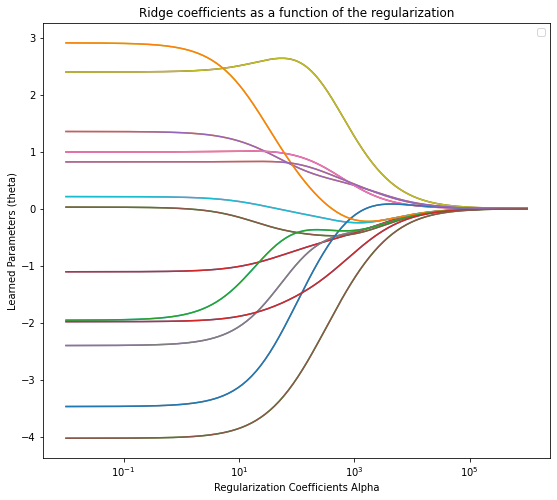

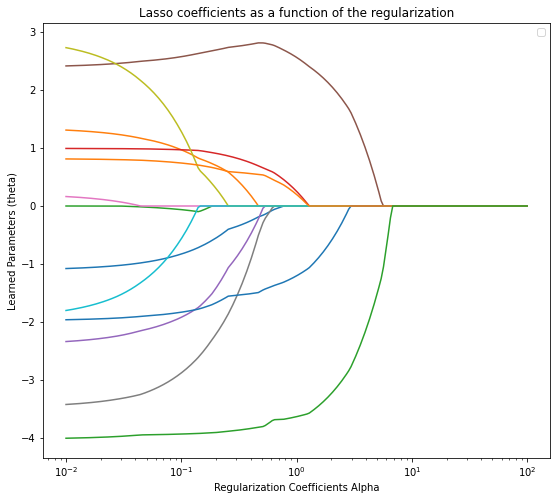

In [291]:
alphas= [0.0001, 0.001, 0.01, 0.1, 1, 5, 10, 100]

compute_ridge(alphas)
compute_lasso(alphas)
compute_elastic_net(alphas)
plot_ridge()
plot_lasso()